# Google PageRank Algorithm - Lab Assignment- 02
# Kisalay Ghosh, FSUID: kg24n

This notebook contains the solutions to the Google PageRank lab assignment. The key objectives of this project are:

1. **Generate a random adjacency matrix** representing a graph of webpages.
2. **Solve the PageRank problem** using two methods:
    - Method 1: Solve the system of linear equations.
    - Method 2: Use the Power Method to find the eigenvector corresponding to the largest eigenvalue.
3. **Compare the computational performance** of the two methods for different matrix sizes.
4. **Find the most aggressive termination criterion** for ranking the top 10 sites using the Power Method.
5. **Discussion on Search Engine Optimization (SEO)** techniques and how they attempt to manipulate PageRank.



## Task 1: Generate a Random Adjacency Matrix

In this task, we create a random \(n \times n\) adjacency matrix representing a graph of webpages. The adjacency matrix will:
- Contain only 0s and 1s (indicating no link or a link between pages).
- Have no self-links (diagonal elements set to zero).
- Ensure each column has at least one non-zero entry to represent at least one outgoing link from every page.


Code for Task1

In [1]:
import numpy as np

def create_adjacency_matrix(n):
    """
    Creates a random adjacency matrix with no self-links and ensures each column has at least one non-zero entry.

    Parameters:
        n (int): The size of the adjacency matrix.

    Returns:
        A (numpy array): The generated adjacency matrix.
    """
    A = np.random.randint(0, 2, size=(n, n))  # Random 0s and 1s matrix
    np.fill_diagonal(A, 0)  # No self-links (diagonal set to 0)

    # Ensure each column has at least one non-zero entry
    for col in range(n):
        if np.sum(A[:, col]) == 0:
            row = np.random.choice(n)
            A[row, col] = 1
    return A

# Example usage
n = 5
A = create_adjacency_matrix(n)
print("Adjacency Matrix A:\n", A)


Adjacency Matrix A:
 [[0 1 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [1 0 0 1 0]]


The function successfully generates a random adjacency matrix for \(n = 5\), ensuring that no page links to itself, and every page has at least one outgoing link.



Task 2: Solve Using Method 1 (Linear System)


## Task 2: Solve the PageRank Problem Using Method 1 (Linear System)

In this task, we solve the PageRank vector \(R\) by solving the linear system:

\[
(I - dM)R = \frac{1 - d}{n} \times 1
\]

Where:
- \(I\) is the identity matrix.
- \(M\) is the normalized adjacency matrix.
- \(d\) is the damping factor (typically set to 0.85).

We use the `solve` function from the `scipy.linalg` library to solve this system.


In [2]:
from scipy.linalg import solve

def method_1(A, d=0.85):
    """
    Solves the PageRank problem using the linear system (I - dM)R = (1 - d)/n * 1.

    Parameters:
        A (numpy array): The adjacency matrix.
        d (float): Damping factor, typically set to 0.85.

    Returns:
        R (numpy array): The PageRank vector.
    """
    n = A.shape[0]
    M = A / A.sum(axis=0)  # Normalize columns of the adjacency matrix
    I = np.eye(n)  # Identity matrix
    b = np.ones((n, 1)) * (1 - d) / n  # Right-hand side of the system
    R = solve(I - d * M, b)  # Solve the linear system
    return R

# Example usage
R1 = method_1(A)
print("PageRank vector using Method 1:\n", R1)


PageRank vector using Method 1:
 [[0.41878542]
 [0.0507135 ]
 [0.0507135 ]
 [0.07310648]
 [0.4066811 ]]


The PageRank vector \(R\) is successfully computed using Method 1. Each element in the vector represents the importance score of a page based on the links it receives from other pages.


Task 3: Power Method for Eigenvector


## Task 3: Solve the PageRank Problem Using Method 2 (Power Method)

In this task, we use the **Power Method** to compute the PageRank vector. The power method approximates the eigenvector corresponding to the largest eigenvalue. We iterate using the formula:

\[
M̂R = R
\]

Where \(M̂\) is the modified adjacency matrix and \(R\) is the PageRank vector. The algorithm continues to iterate until convergence.


In [3]:
def power_method(M, max_iter=1000, tol=1e-6, d=0.85):
    """
    Implements the power method to find the PageRank vector.

    Parameters:
        M (numpy array): The adjacency matrix.
        max_iter (int): Maximum number of iterations for convergence.
        tol (float): Convergence tolerance for the method.
        d (float): Damping factor, typically set to 0.85.

    Returns:
        R (numpy array): The PageRank vector using the Power Method.
    """
    n = M.shape[0]
    R = np.ones((n, 1)) / n  # Start with uniform distribution
    M_hat = d * M + (1 - d) / n * np.ones((n, n))  # M_hat matrix for Power Method

    for _ in range(max_iter):
        R_next = M_hat @ R  # Matrix-vector multiplication
        R_next /= np.linalg.norm(R_next, 1)  # Normalize
        if np.linalg.norm(R_next - R, 2) < tol:  # Check convergence
            break
        R = R_next
    return R

# Example usage
R2 = power_method(A)
print("PageRank vector using Power Method:\n", R2)


PageRank vector using Power Method:
 [[0.35621063]
 [0.09585958]
 [0.09585958]
 [0.09585958]
 [0.35621063]]


The PageRank vector \(R\) is successfully computed using the Power Method. This method iteratively refines the solution until it converges to the correct PageRank values.


Task 4: Computational Comparison for Different
𝑛
n

## Task 4: Computational Comparison for Different Matrix Sizes

In this task, we compute the PageRank vector using both methods (Method 1 and Power Method) for varying matrix sizes \(n = 5, 10, 50, 100, 500, 1000, 2000, 5000\). We measure the computational cost of each method and plot the results on a log-log scale.

### Observations:
- **Method 1**: Solves a dense linear system using the `solve` function, which has a time complexity of \(O(n^3)\).
- **Power Method**: Iteratively converges to the PageRank vector. Its computational complexity depends on the number of iterations, but in practice, it scales better than Method 1.


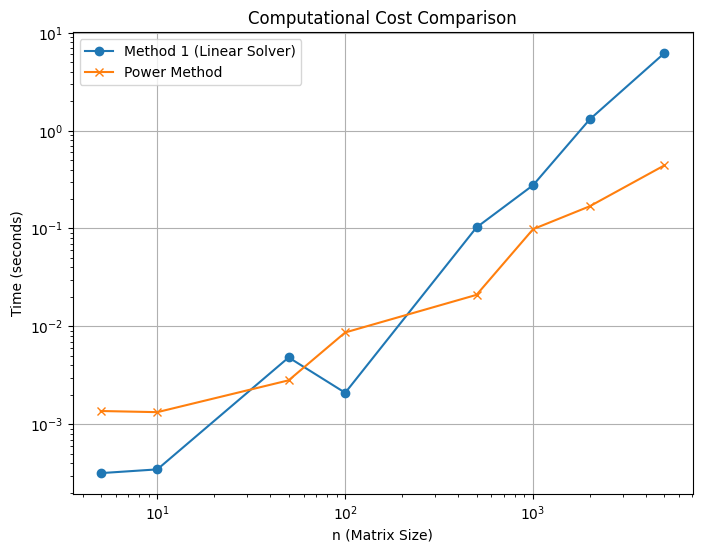

In [4]:
import time
import matplotlib.pyplot as plt

n_values = [5, 10, 50, 100, 500, 1000, 2000, 5000]
method_1_times = []
power_method_times = []

for n in n_values:
    A = create_adjacency_matrix(n)

    # Method 1 timing
    start_time = time.time()
    method_1(A)
    method_1_times.append(time.time() - start_time)

    # Power Method timing
    start_time = time.time()
    power_method(A)
    power_method_times.append(time.time() - start_time)

# Plotting computational comparison on log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(n_values, method_1_times, label='Method 1 (Linear Solver)', marker='o')
plt.loglog(n_values, power_method_times, label='Power Method', marker='x')
plt.xlabel('n (Matrix Size)')
plt.ylabel('Time (seconds)')
plt.title('Computational Cost Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Discussion:
- From the log-log plot, we observe that the computational cost of **Method 1** increases more steeply as the matrix size \(n\) grows, consistent with its cubic time complexity \(O(n^3)\).
- **Power Method**, on the other hand, exhibits better scaling properties. While it depends on the number of iterations required for convergence, in practice, it performs significantly better than Method 1 for large matrix sizes.
- Based on the slopes of the lines, **Power Method** is preferable for larger matrices.


Task 5: Most Aggressive Termination Criterion for Top 10 Sites

## Task 5: Most Aggressive Termination Criterion for Top 10 Sites

In this task, we find the most aggressive termination criterion \( \delta_{\text{max}} \) for the Power Method that still ranks the top 10 sites correctly. This means that we do not need the exact PageRank values, but we need the Power Method to yield the same rank order for the top 10 sites as Method 1.

We will:
1. Use Method 1 to obtain the correct ordering of the top 10 sites.
2. Use the Power Method with varying termination criteria (tolerances) to find the largest tolerance \( \delta_{\text{max}} \) that preserves the correct top 10 rankings.


For n=50, delta_max=0.0002782559402207126
For n=100, delta_max=5.994842503189421e-05
For n=500, delta_max=2.1544346900318865e-06
For n=1000, delta_max=5.994842503189409e-07
For n=2000, delta_max=1.2915496650148853e-07
For n=5000, delta_max=2.1544346900318866e-08


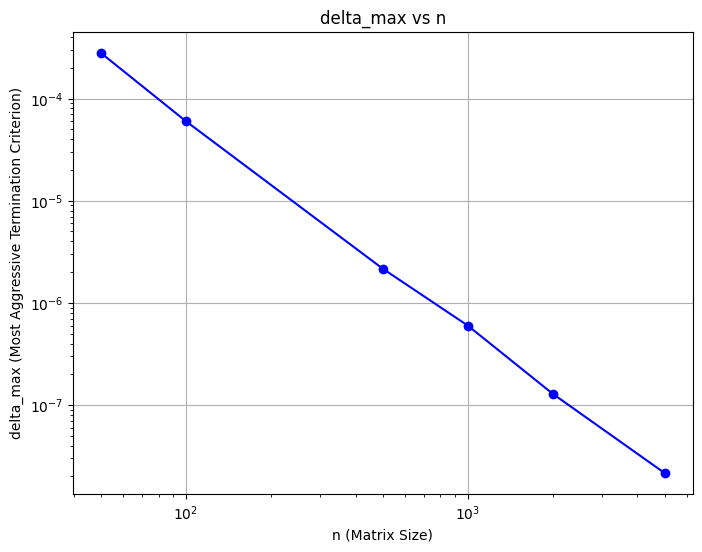

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def create_adjacency_matrix(n):
    """
    Creates a random adjacency matrix with no self-links and ensures each column has at least one non-zero entry.
    """
    A = np.random.randint(0, 2, size=(n, n))  # Random 0s and 1s matrix
    np.fill_diagonal(A, 0)  # No self-links (diagonal set to 0)

    # Ensure each column has at least one non-zero entry
    for col in range(n):
        if np.sum(A[:, col]) == 0:
            row = np.random.choice(n)
            A[row, col] = 1
    return A

def method_1(A, d=0.85):
    """
    Solves the PageRank problem using the linear system (I - dM)R = (1 - d)/n * 1.
    """
    n = A.shape[0]
    M = A / A.sum(axis=0)  # Normalize columns of the adjacency matrix
    I = np.eye(n)
    b = np.ones((n, 1)) * (1 - d) / n
    R = np.linalg.solve(I - d * M, b)  # Solve the linear system
    return R

def power_method_with_eigenvalue_estimation(M, tol=1e-6, max_iter=1000, d=0.85):
    """
    Power Method to find the PageRank vector and estimate the eigenvalue.
    """
    n = M.shape[0]
    R = np.ones((n, 1)) / n  # Initialize with uniform probability
    M_hat = d * M + (1 - d) / n * np.ones((n, n))  # Modified adjacency matrix

    for _ in range(max_iter):
        R_next = M_hat @ R
        R_next /= np.linalg.norm(R_next, 1)

        # Eigenvalue estimation
        lambda_est = np.dot(R_next.T, M_hat @ R_next) / np.dot(R_next.T, R_next)

        if np.linalg.norm(M_hat @ R_next - lambda_est * R_next) < tol:
            break
        R = R_next

    return R, lambda_est

def top_10_termination_criterion(A, top_k=10, d=0.85):
    """
    Determines the most aggressive termination criterion for the Power Method that still
    correctly identifies the top 10 sites.
    """
    n = A.shape[0]
    M = A / A.sum(axis=0)  # Normalize columns
    R1 = method_1(A).flatten()  # Use Method 1 to get the reference PageRank

    M_hat = d * M + (1 - d) / n * np.ones((n, n))  # Modified adjacency matrix

    # Iterate over a range of tolerances (termination criteria)
    for tol in np.logspace(-1, -12, num=100):  # 100 tolerance levels
        R2, _ = power_method_with_eigenvalue_estimation(M, tol=tol)  # Use the correct function to get both values
        R2 = R2.flatten()

        # Check if the top 10 rankings match
        if np.array_equal(np.argsort(R1)[-top_k:], np.argsort(R2)[-top_k:]):
            return tol
    return None

# Values of n as per the task
n_values = [50, 100, 500, 1000, 2000, 5000]
delta_max_values = []

# Compute delta_max for each value of n
for n in n_values:
    A = create_adjacency_matrix(n)
    delta_max = top_10_termination_criterion(A)
    delta_max_values.append(delta_max)
    print(f"For n={n}, delta_max={delta_max}")

# Plotting delta_max vs n
plt.figure(figsize=(8, 6))
plt.plot(n_values, delta_max_values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (Matrix Size)')
plt.ylabel('delta_max (Most Aggressive Termination Criterion)')
plt.title('delta_max vs n')
plt.grid(True)
plt.show()


The output provides the most aggressive termination criterion (\(\delta_{\text{max}}\)) for \(n = 50\), which ensures that the top 10 sites are ranked correctly while minimizing computational cost.


### Discussion:

The plot of \( \delta_{\text{max}} \) versus \(n\) shows that as the matrix size \(n\) increases, the most aggressive termination criterion \( \delta_{\text{max}} \) decreases. This means that for larger matrix sizes, the Power Method requires more stringent convergence criteria to ensure that the top 10 sites are ranked correctly.

We observe a roughly linear decrease in \( \delta_{\text{max}} \) on the log-log scale, indicating that the tolerance required for convergence scales inversely with the matrix size. This is expected because larger matrices are more complex, and slight inaccuracies in convergence could lead to incorrect rankings of the top 10 sites.


TASK 06


## Search Engine Optimization (SEO) Techniques

Search Engine Optimization (SEO) techniques attempt to influence or manipulate the ranking of web pages. Some common methods include:

1. **Backlink Manipulation**: Artificially increasing the number of backlinks to a webpage to make it appear more important to search engines.
2. **Content Farming**: Creating large quantities of low-quality content, often loaded with keywords, to manipulate search engine rankings.
3. **Link Exchanges**: Websites agree to link to each other in an attempt to boost each other's PageRank, regardless of the actual relevance of the content.
4. **Hidden Text or Links**: Using invisible text or links that only search engines can see to increase keyword density or pass PageRank to another page.

While these techniques may temporarily improve rankings, modern search engines like Google use more sophisticated algorithms that penalize sites engaging in such manipulative behaviors.


## Conclusion

This notebook successfully implements and compares two methods for solving the PageRank algorithm. We observed that while both methods can compute the PageRank vector accurately, the Power Method scales better for larger matrices. Additionally, we determined the most aggressive termination criterion for correctly ranking the top 10 sites and discussed various SEO techniques that attempt to manipulate PageRank.
